<a href="https://colab.research.google.com/github/kangand/1000ml/blob/master/Assignment_7/Draft_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing image classification at a basic level with smaller image dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'
plt.rcParams['figure.edgecolor']='w'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/Drive


In [4]:
import torch

from fastai.vision import get_transforms
from fastai.vision.data import ImageList
from fastai.vision import defaults
from fastai.metrics import error_rate
from fastai.vision.learner import create_cnn
from fastai.vision.models import resnet34
from fastai.widgets import *

In [5]:
path = '/content/Drive/My Drive/jewelery_images'
splits = ['train', 'valid', 'test']
classes = ['bracelet', 'earrings', 'necklace', 'ring']

for i in splits:
  for j in classes:
    print(os.path.join(path,i,j))
    if not os.path.exists(os.path.join(path,i,j)):
      os.makedirs(os.path.join(path,i,j))

/content/Drive/My Drive/jewelery_images/train/bracelet
/content/Drive/My Drive/jewelery_images/train/earrings
/content/Drive/My Drive/jewelery_images/train/necklace
/content/Drive/My Drive/jewelery_images/train/ring
/content/Drive/My Drive/jewelery_images/valid/bracelet
/content/Drive/My Drive/jewelery_images/valid/earrings
/content/Drive/My Drive/jewelery_images/valid/necklace
/content/Drive/My Drive/jewelery_images/valid/ring
/content/Drive/My Drive/jewelery_images/test/bracelet
/content/Drive/My Drive/jewelery_images/test/earrings
/content/Drive/My Drive/jewelery_images/test/necklace
/content/Drive/My Drive/jewelery_images/test/ring


In [6]:
tfms = get_transforms(do_flip=False)

In [7]:
data = (ImageList.from_folder(path)
  .split_by_rand_pct()
  .label_from_folder()
  .transform(tfms,size=64)
  .databunch())

In [8]:
data.batch_size

64

In [9]:
learn = create_cnn(data, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [10]:
defaults.device = torch.device('cuda')

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.128083,0.913366,0.338583,01:09
1,1.552755,0.859446,0.338583,00:31
2,1.240132,0.726300,0.228346,00:28
3,1.054706,0.599159,0.188976,00:30


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


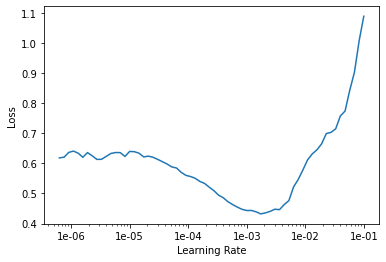

In [12]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [13]:
ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [14]:
df = pd.read_csv(os.path.join(path, 'cleaned.csv'), header='infer')
df.head()

,name,label
0,valid/ring/image8.jpeg,ring
1,valid/ring/image0.jpeg,ring
2,valid/ring/image3.jpeg,ring
3,valid/ring/image7.jpeg,ring
4,valid/ring/image12.jpeg,ring


In [15]:
interp = ClassificationInterpretation.from_learner(learn)

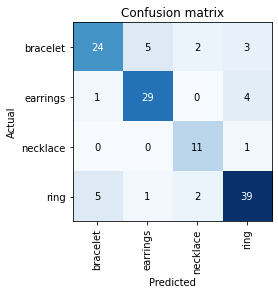

In [16]:
interp.plot_confusion_matrix()

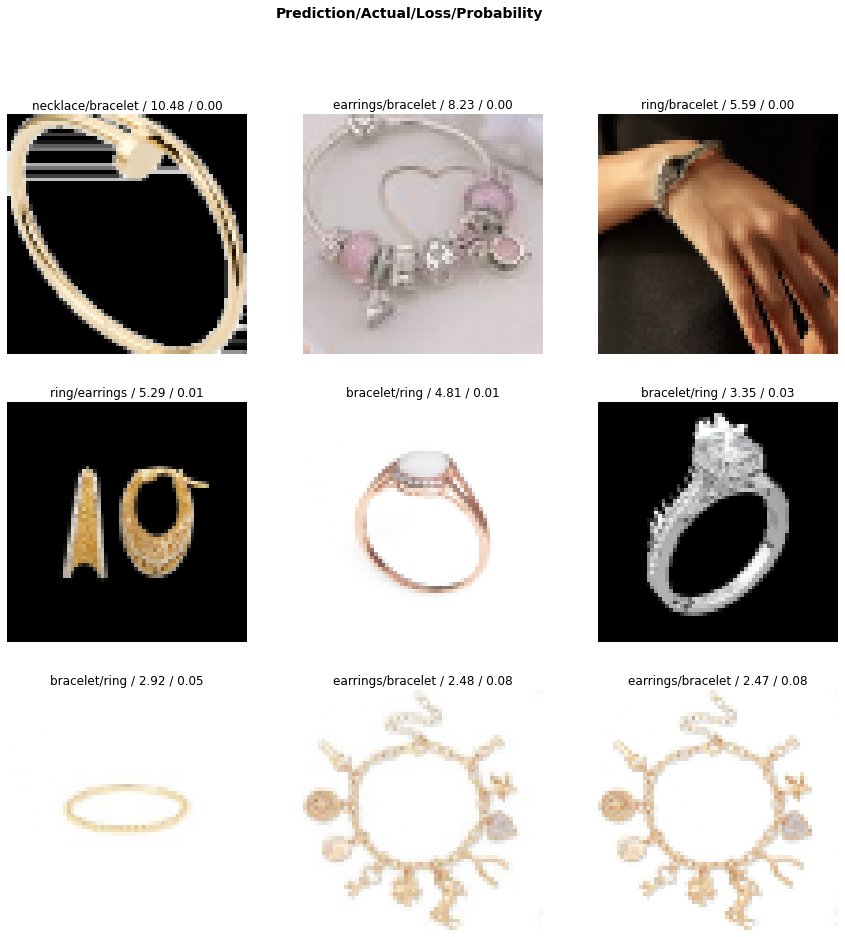

In [17]:
interp.plot_top_losses(9, figsize=(15,15))

In [19]:
import tensorflow as tf

In [21]:
xcept = tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [23]:
xcept.compile()

Resetnet50

In [44]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator()
                                 
train_generator = train_datagen.flow_from_directory(
    directory=(path+"/train"),
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
)
valid_generator = train_datagen.flow_from_directory(
    directory=(path+"/valid"),
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
    
)
test_generator = test_datagen.flow_from_directory(
    directory=(path+"/test"),
    target_size=(224, 224),
    batch_size=1,
    class_mode=None
)



filenames = test_generator.filenames
nb_samples = len(filenames)




Found 415 images belonging to 4 classes.
Found 120 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [52]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.layers import Dense, Activation, Flatten,GlobalAveragePooling2D,Dropout
from tensorflow.keras.layers import  Input
from tensorflow.keras.models import  Model,Sequential

In [57]:
image_input = Input(shape=(224, 224, 3))
Restnet50 = Sequential()
Restnet50.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
Restnet50.add(Dense(1024, activation='relu'))
Restnet50.add(Dense(512, activation='relu'))
Restnet50.add(Dense(4, activation='softmax'))


# Say not to train first layer (ResNet) model. It is already trained
Restnet50.layers[0].trainable = False
Restnet50.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 2052      
Total params: 26,212,740
Trainable params: 2,625,028
Non-trainable params: 23,587,712
_________________________________________________________________


In [58]:
from tensorflow.python.keras import optimizers


Restnet50.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
Restnet50.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 2052      
Total params: 26,212,740
Trainable params: 2,625,028
Non-trainable params: 23,587,712
_________________________________________________________________


In [59]:
Restnet50.layers[0].trainable = False
Restnet50.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 2052      
Total params: 26,212,740
Trainable params: 2,625,028
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
Restnet50.fit_generator(generator=train_generator,
                    steps_per_epoch=359,
                    verbose=1,
                    epochs=1,
                    validation_data=valid_generator,
                    validation_steps=31
)

  4/359 [..............................] - ETA: 38:05 - loss: 1.8461 - accuracy: 0.4036

In [ ]:
test_generator.reset()
pred=Restnet50.predict_generator(test_generator,steps = nb_samples)